In [ ]:
!nvidia-smi

Thu May 11 20:12:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display

import ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 16.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
pwd

'/content'

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eBm5cXa58K153292z0tn")
project = rf.workspace("isaac-agyemang").project("damage-level")
dataset = project.version(2).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.98, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Damage-Level-2 in yolov8:: 100%|██████████| 9272/9272 [00:03<00:00, 2541.53it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Damage-Level-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False,

In [ ]:
!ls /content/runs/detect/train3

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1683837495.47fdd6aa1f24.9846.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


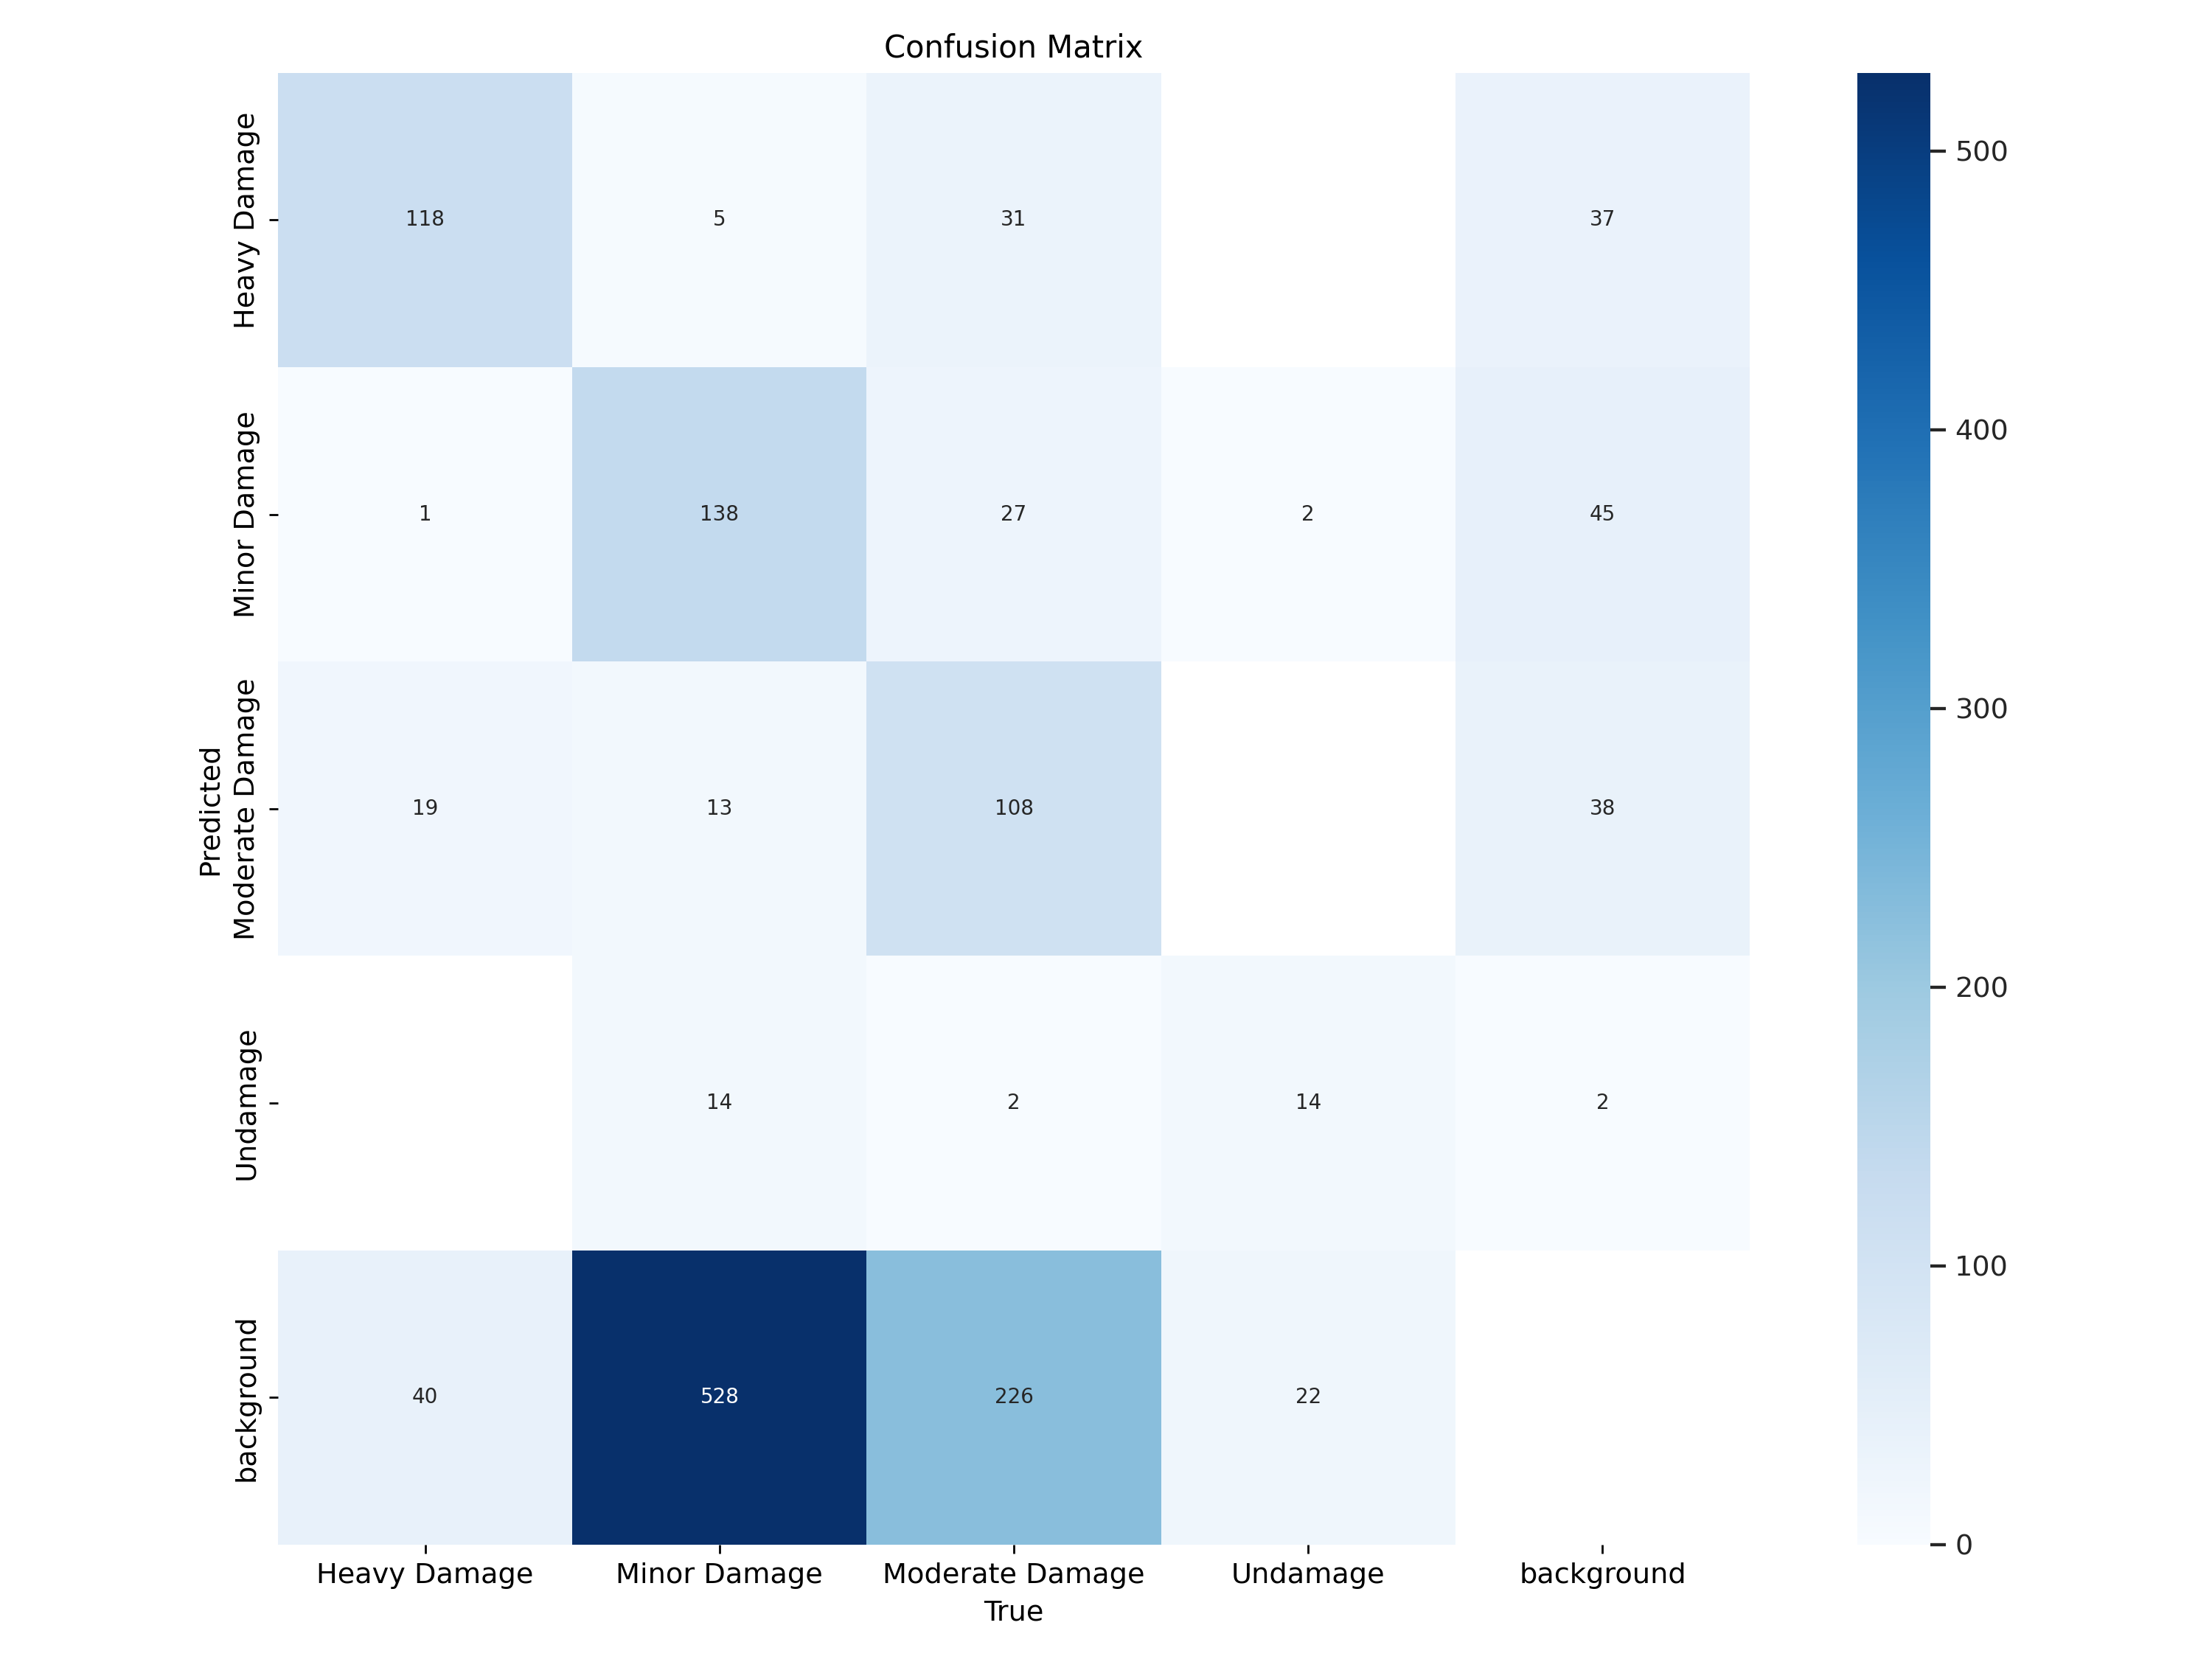

In [ ]:
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

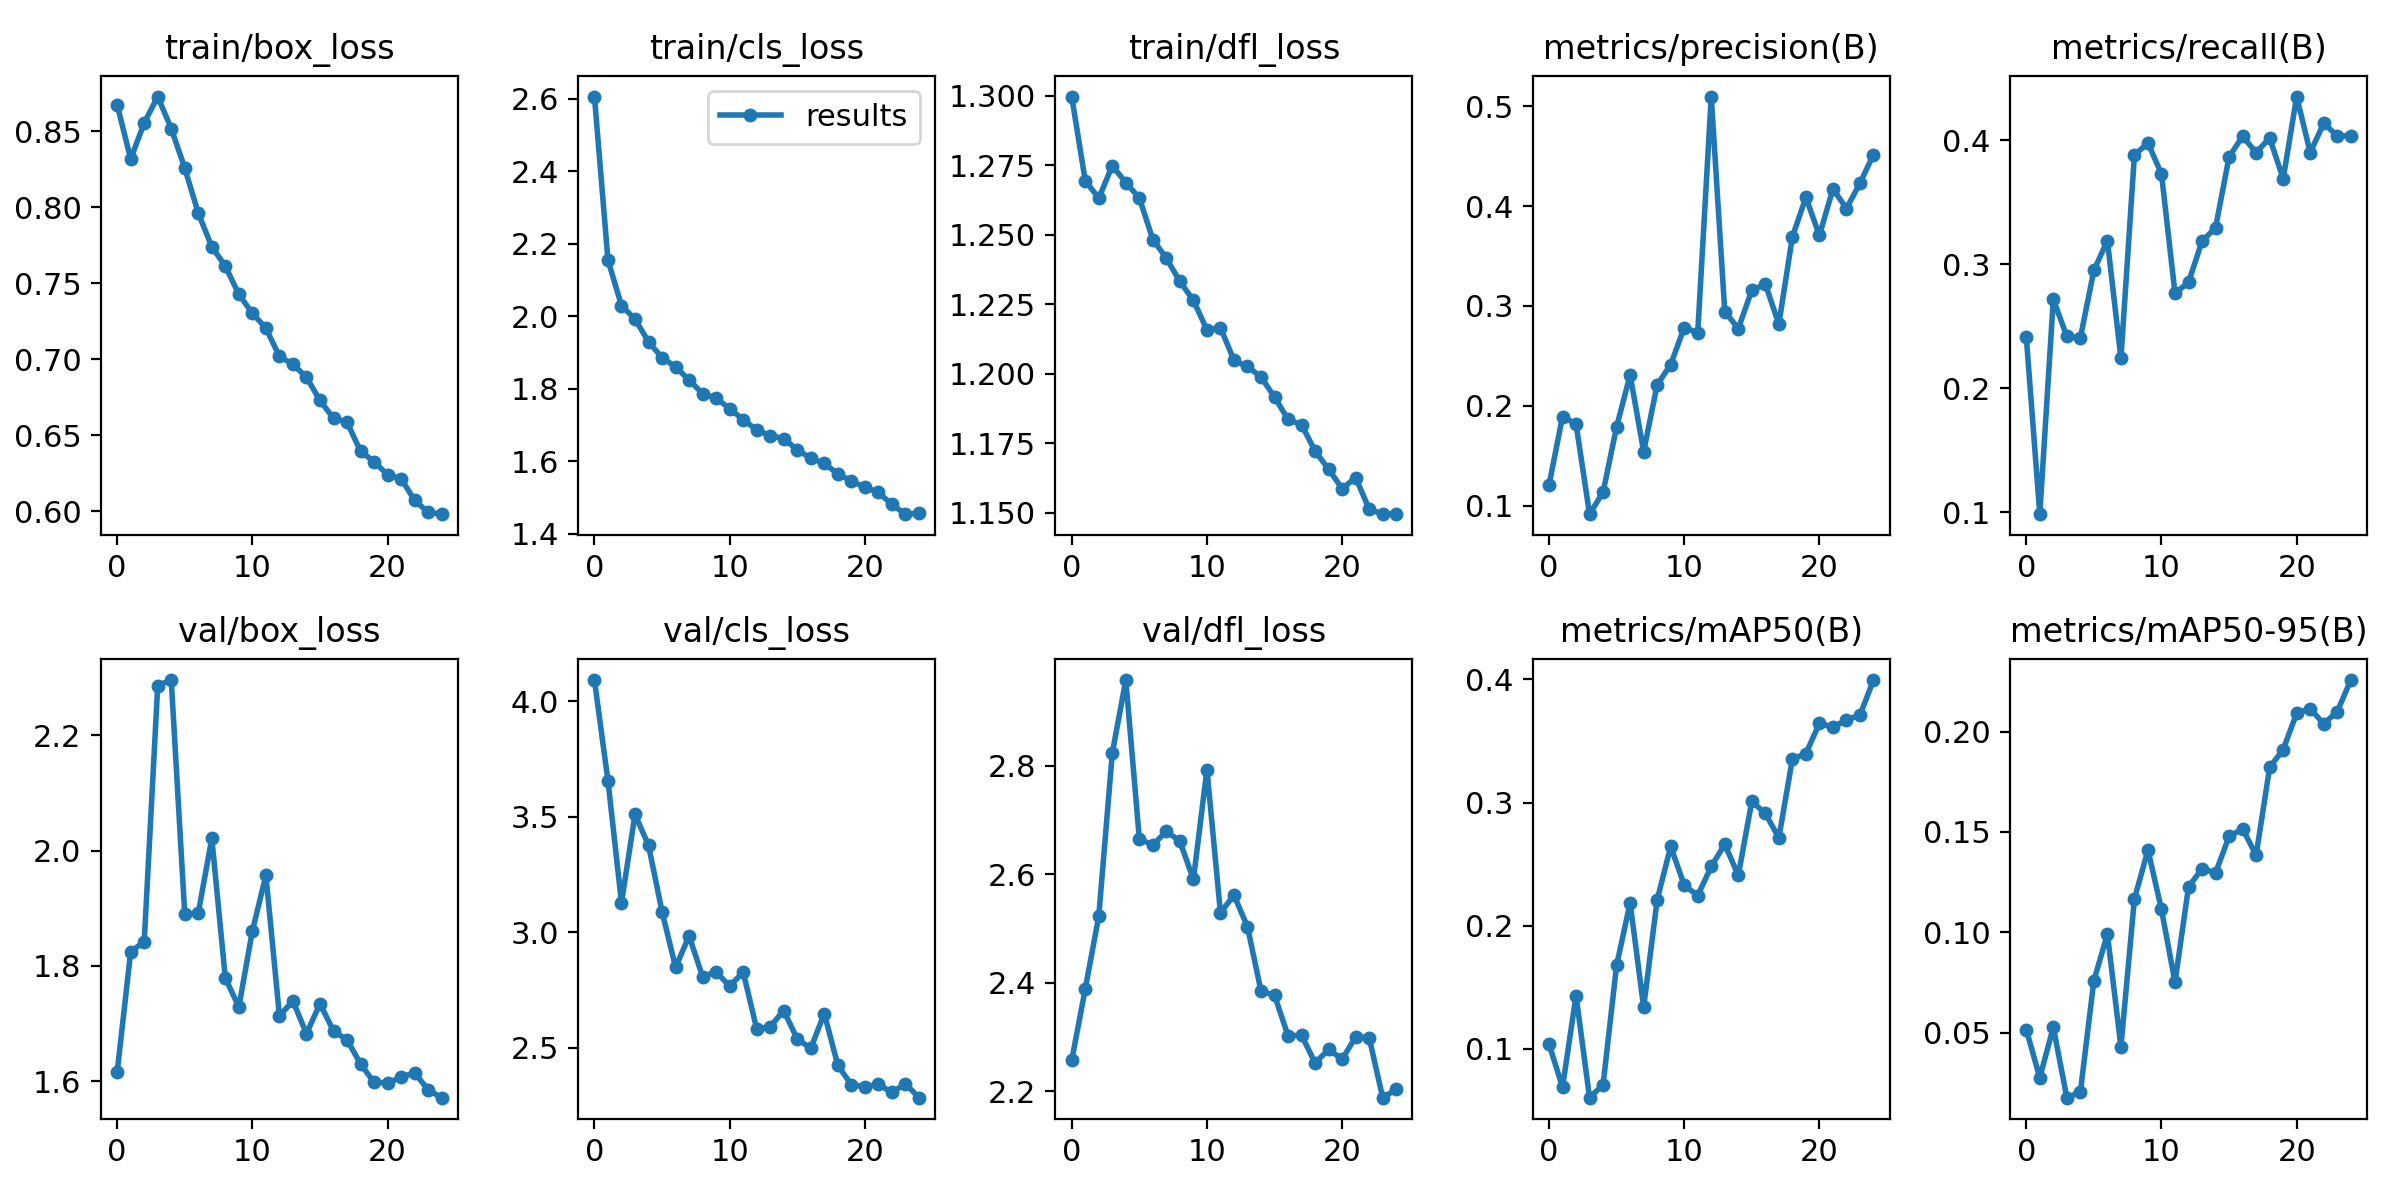

In [ ]:
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

# Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Damage-Level-2/valid/labels.cache... 1008 images, 0 backgrounds, 0 corrupt: 100% 1008/1008 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:15<00:00,  4.20it/s]
                   all       1008       1308      0.451      0.404      0.399      0.226
          Heavy Damage       1008        178      0.561      0.704      0.666      0.391
          Minor Damage       1008        698      0.446      0.203      0.242      0.114
       Moderate Damage       1008        394      0.531      0.312       0.36      0.179
              Undamage       1008         38      0.264      0.395      0.328      0.219
Speed: 0.6ms preprocess, 4.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


# Inference with Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Damage-Level-2/valid/labels.cache... 1008 images, 0 backgrounds, 0 corrupt: 100% 1008/1008 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:12<00:00,  4.98it/s]
                   all       1008       1308       0.47      0.383      0.435      0.275
          Heavy Damage       1008        178      0.584      0.685      0.679      0.437
          Minor Damage       1008        698       0.47      0.192      0.324      0.189
       Moderate Damage       1008        394      0.551      0.287      0.394      0.228
              Undamage       1008         38      0.275      0.368      0.341      0.246
Speed: 0.7ms preprocess, 4.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2


## take a look at few results.

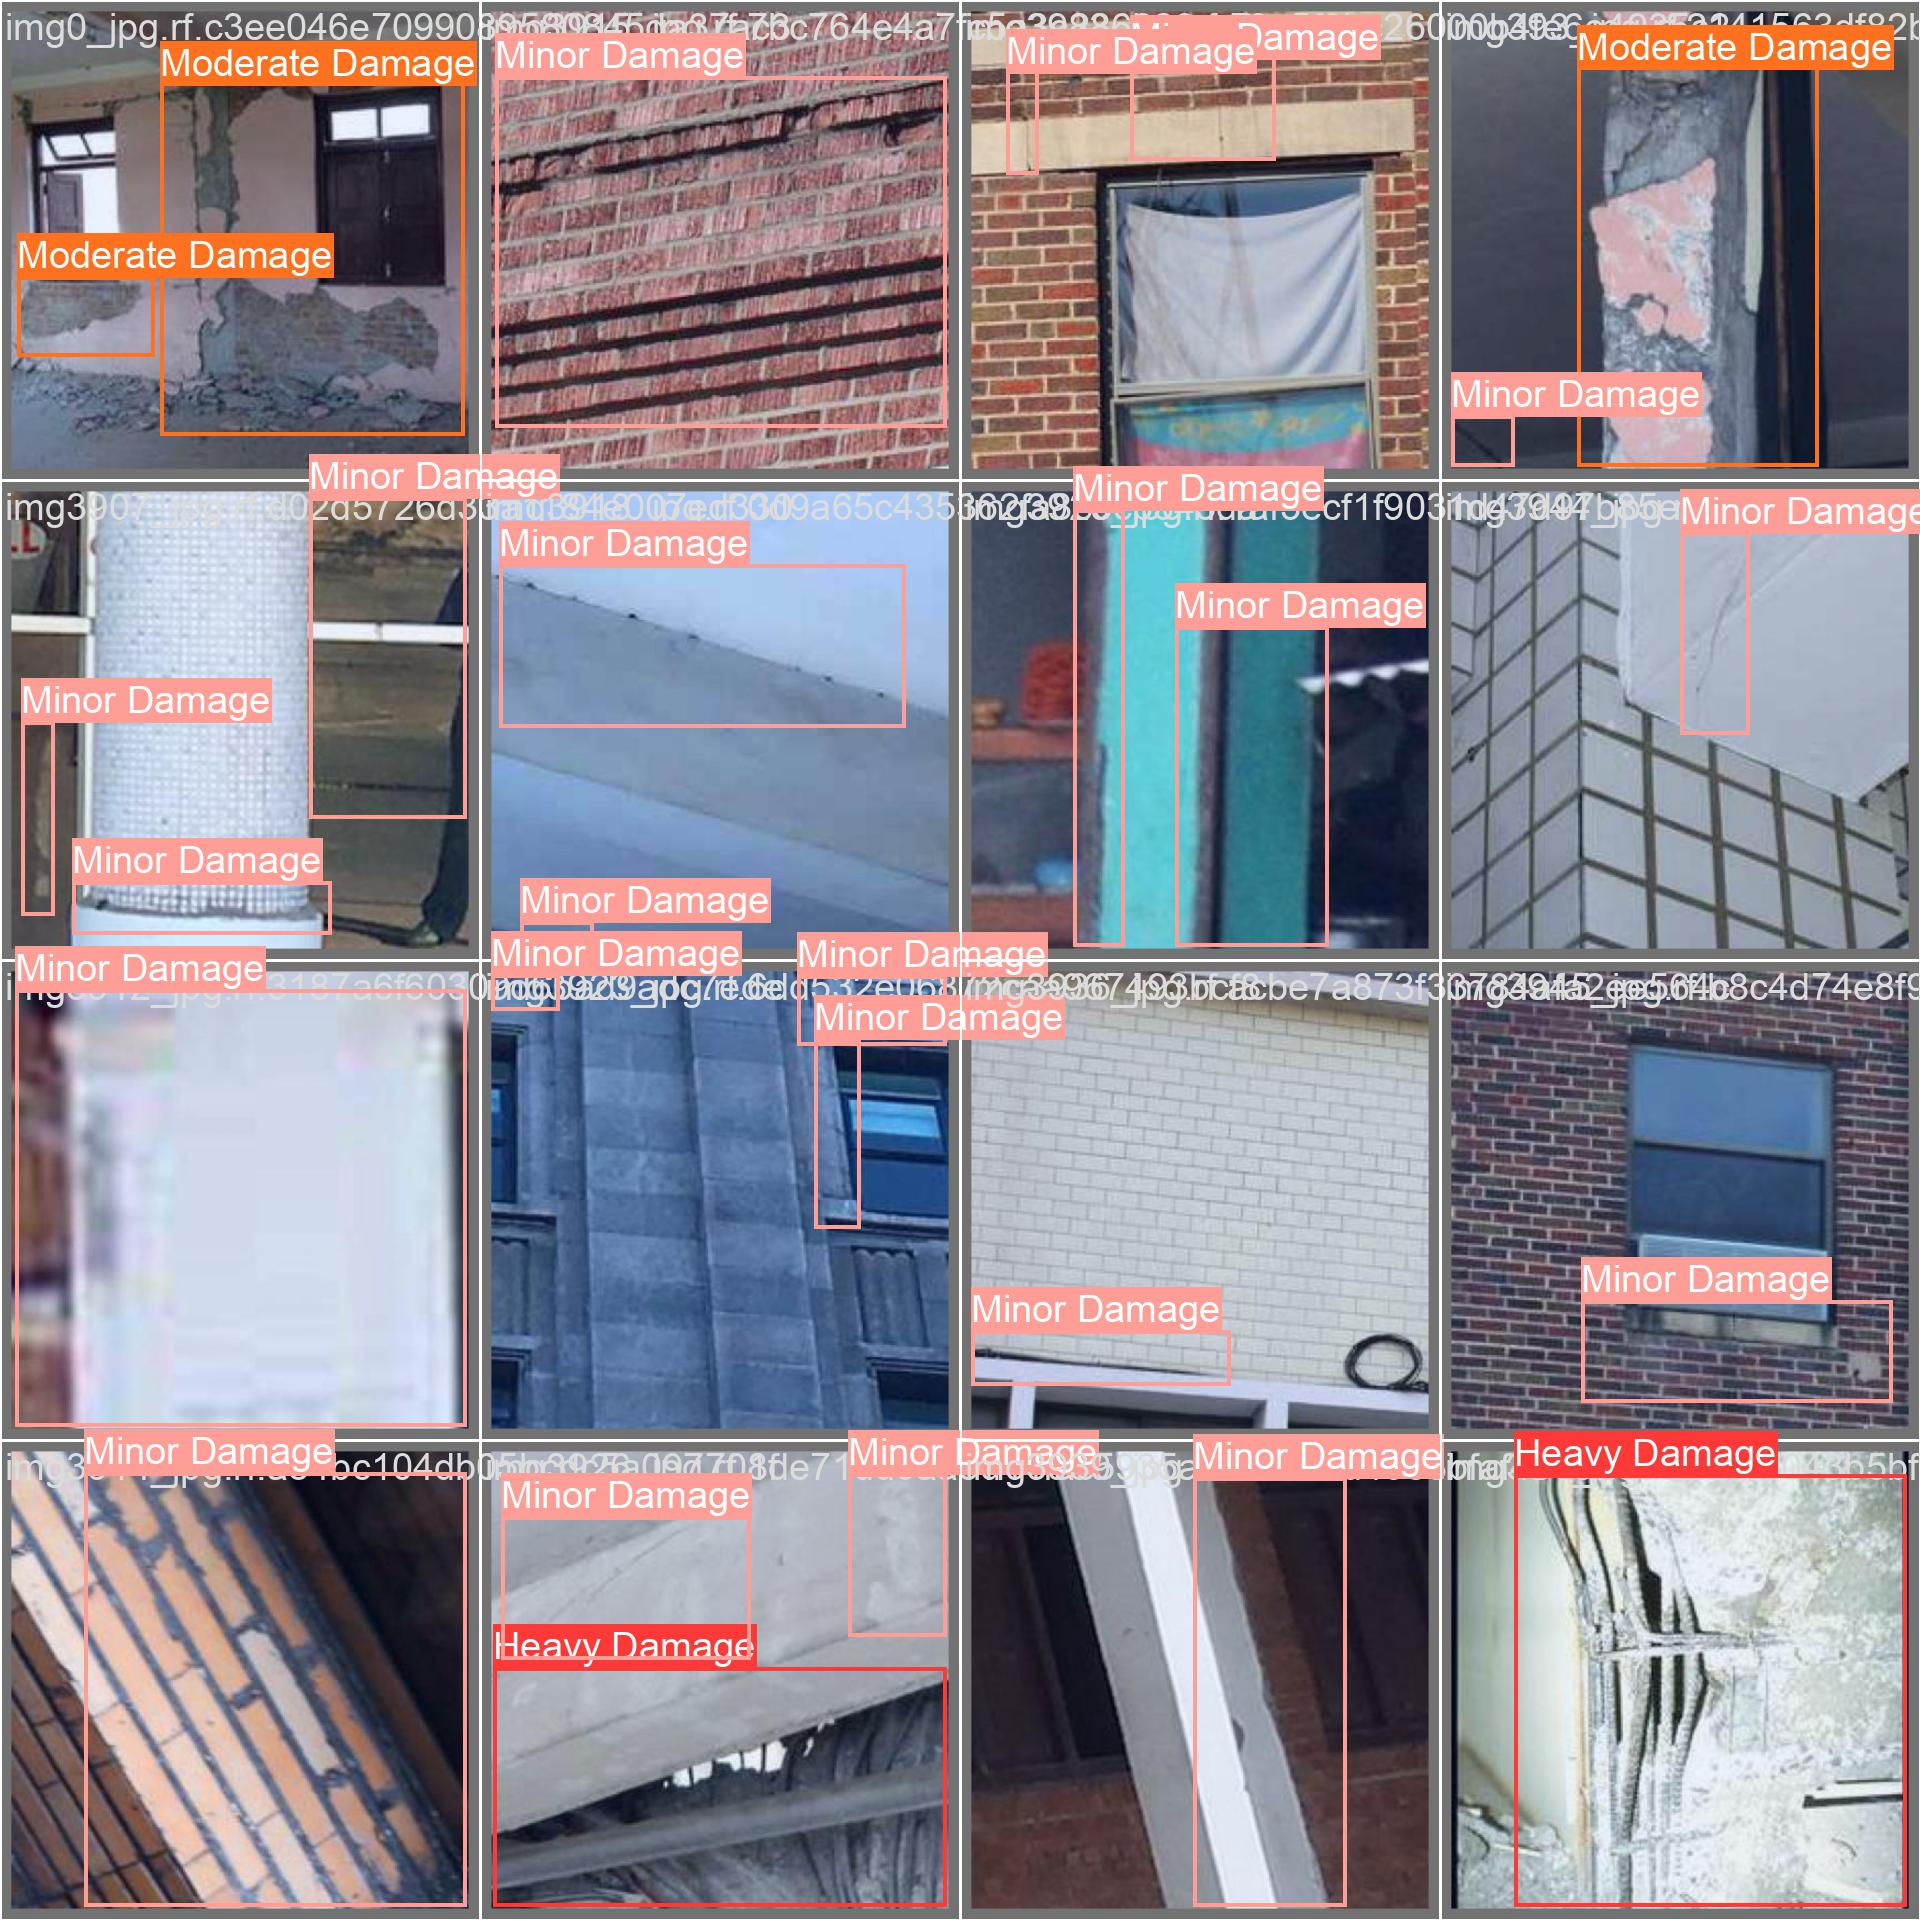

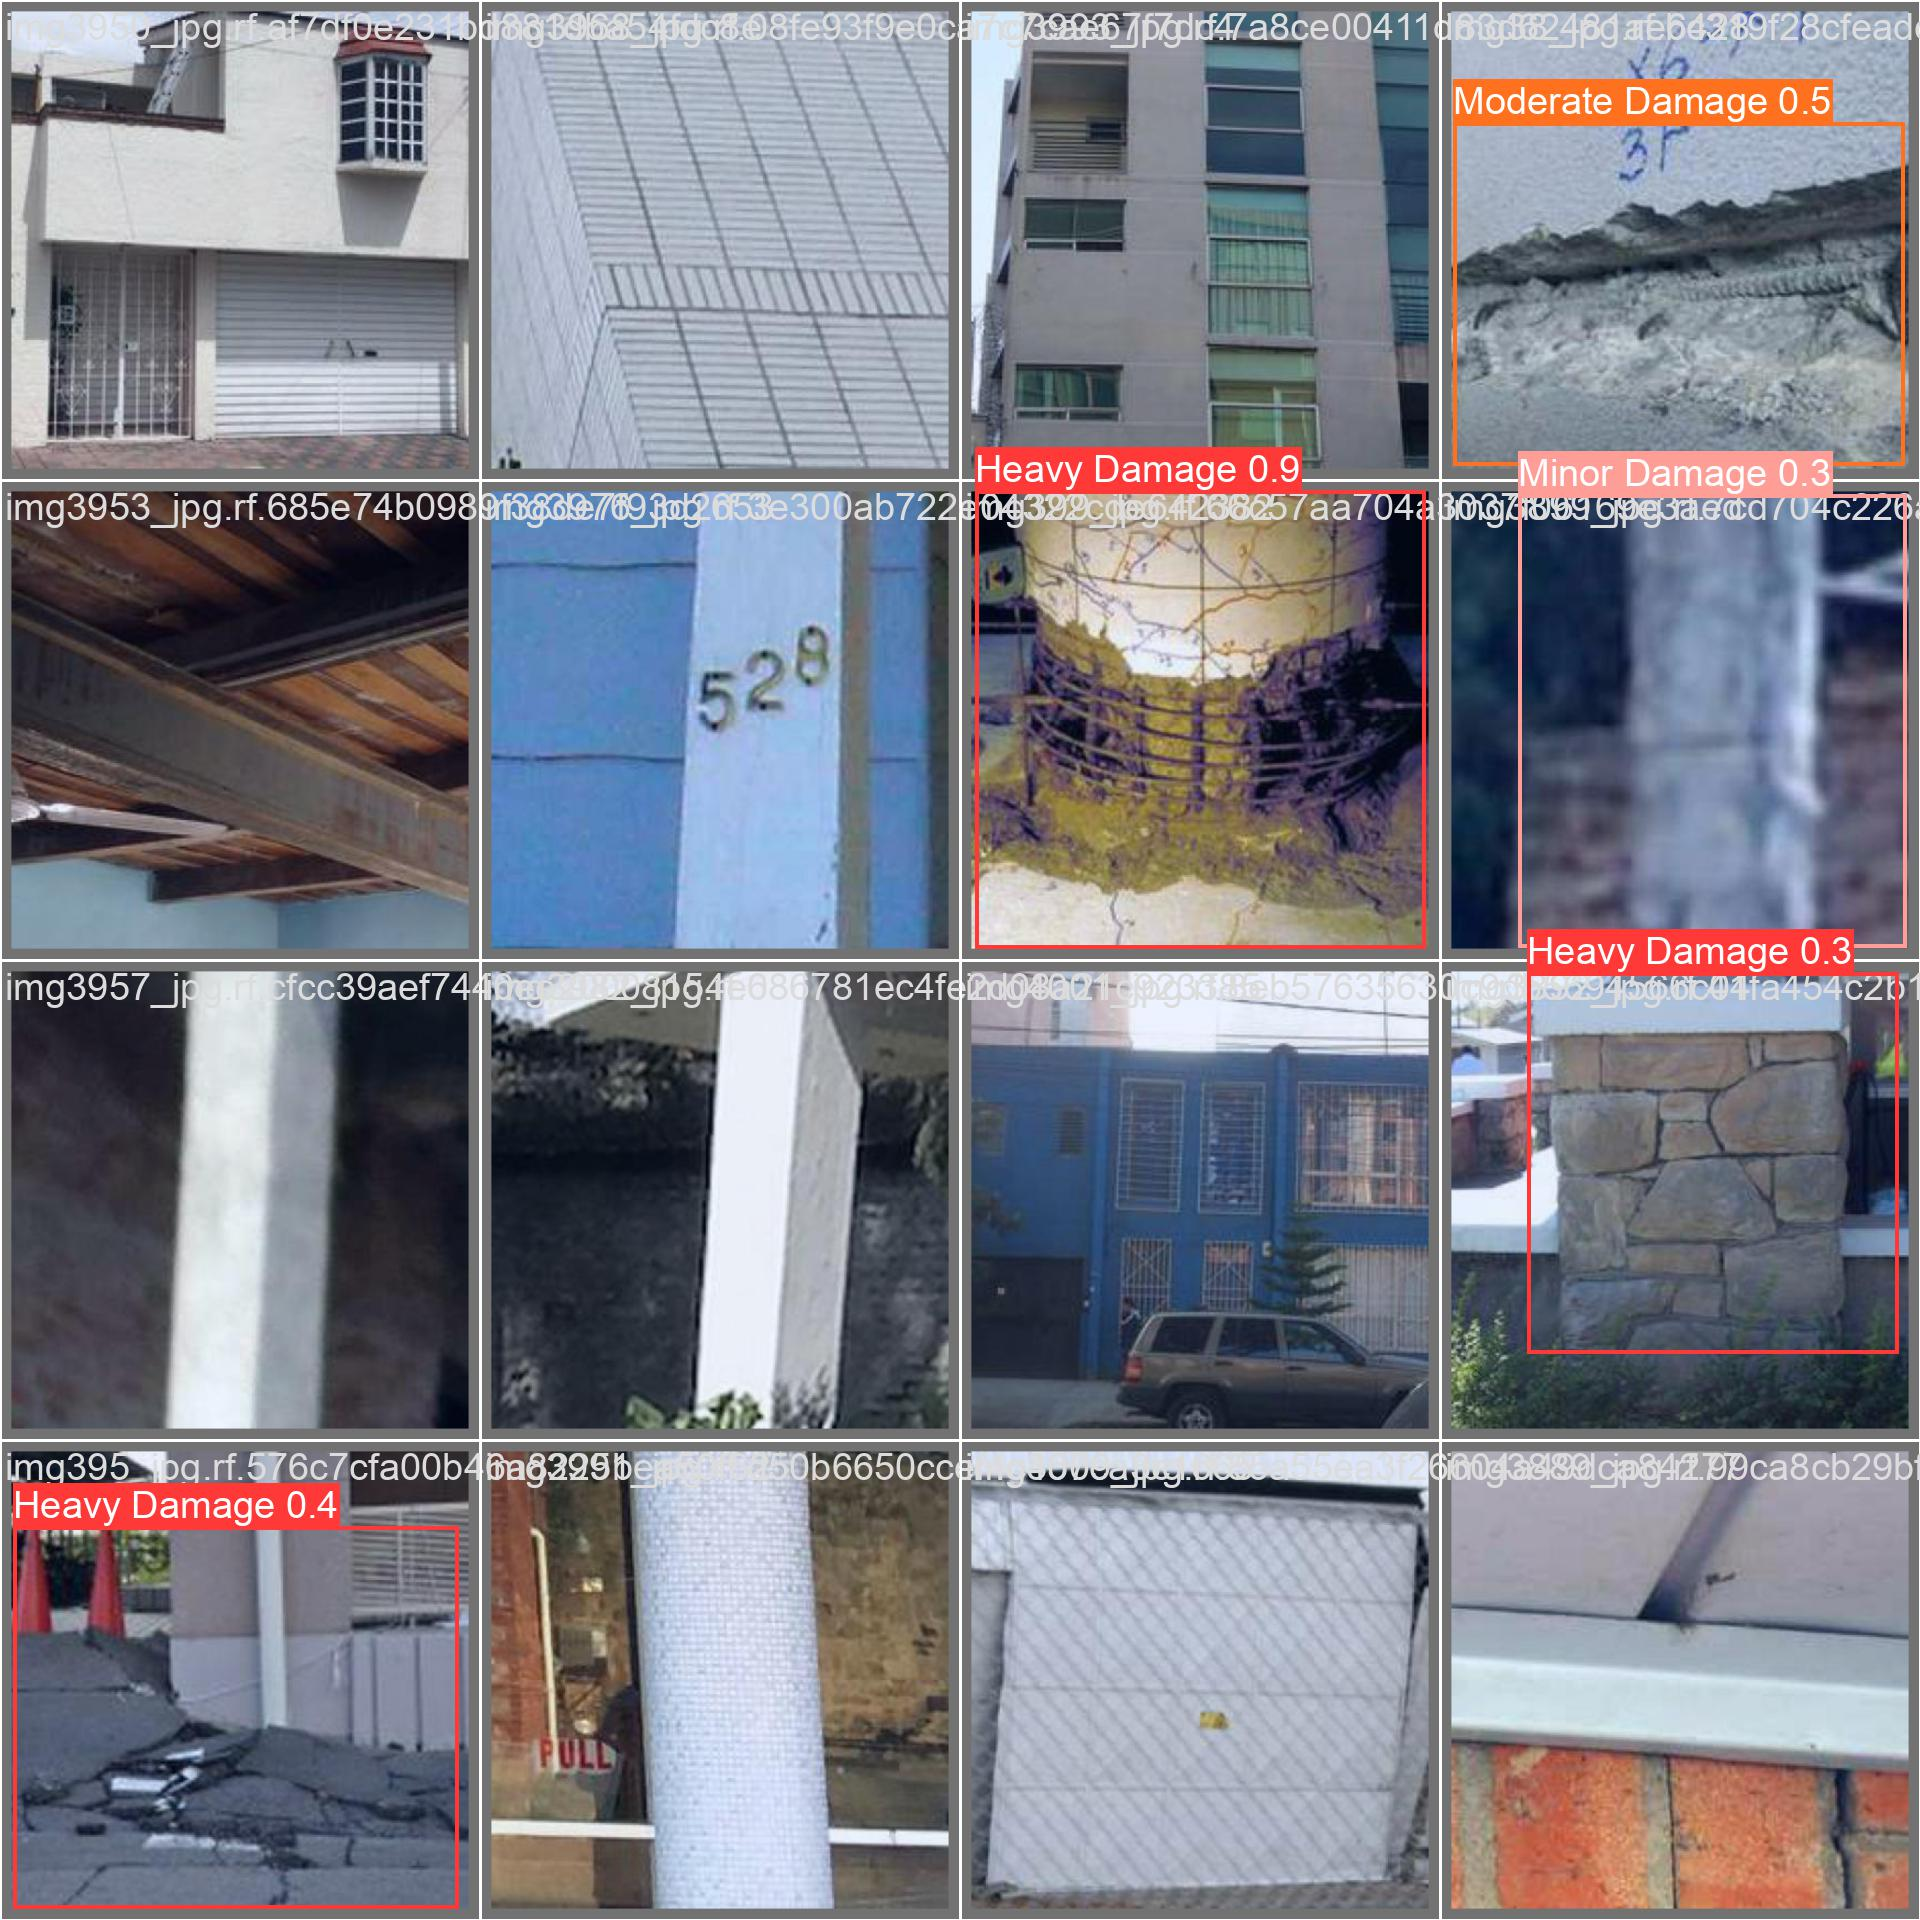

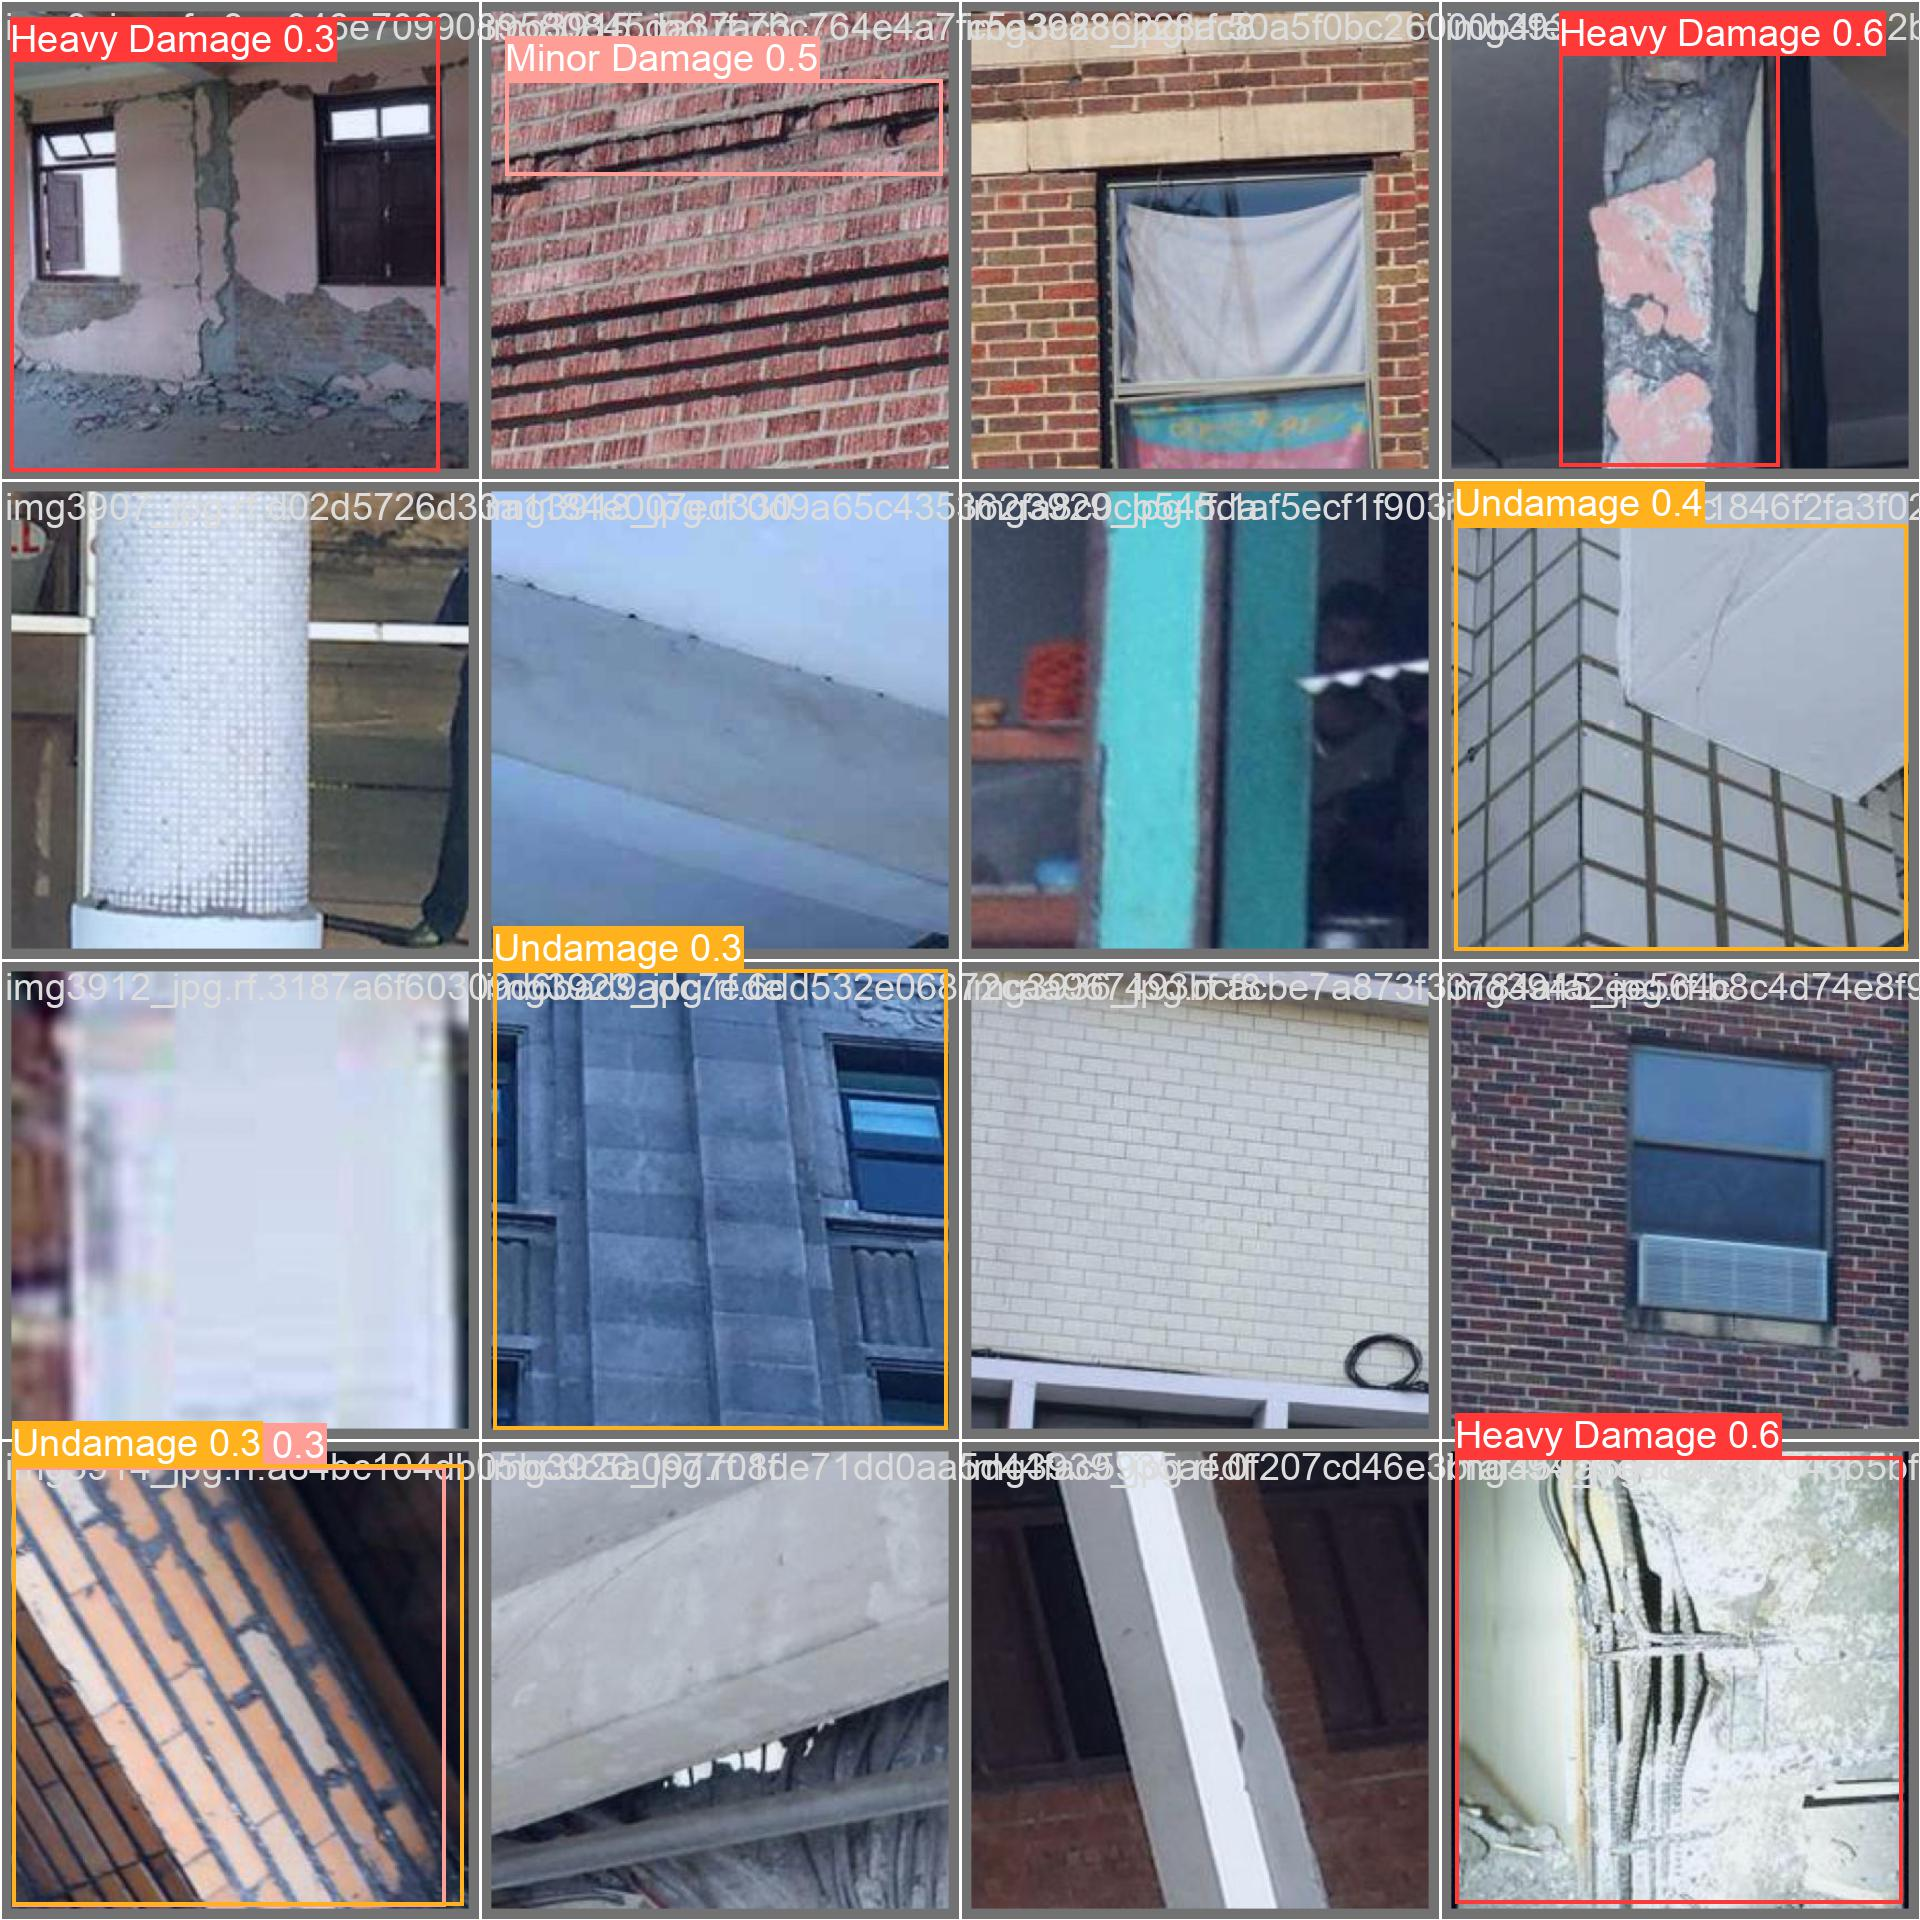

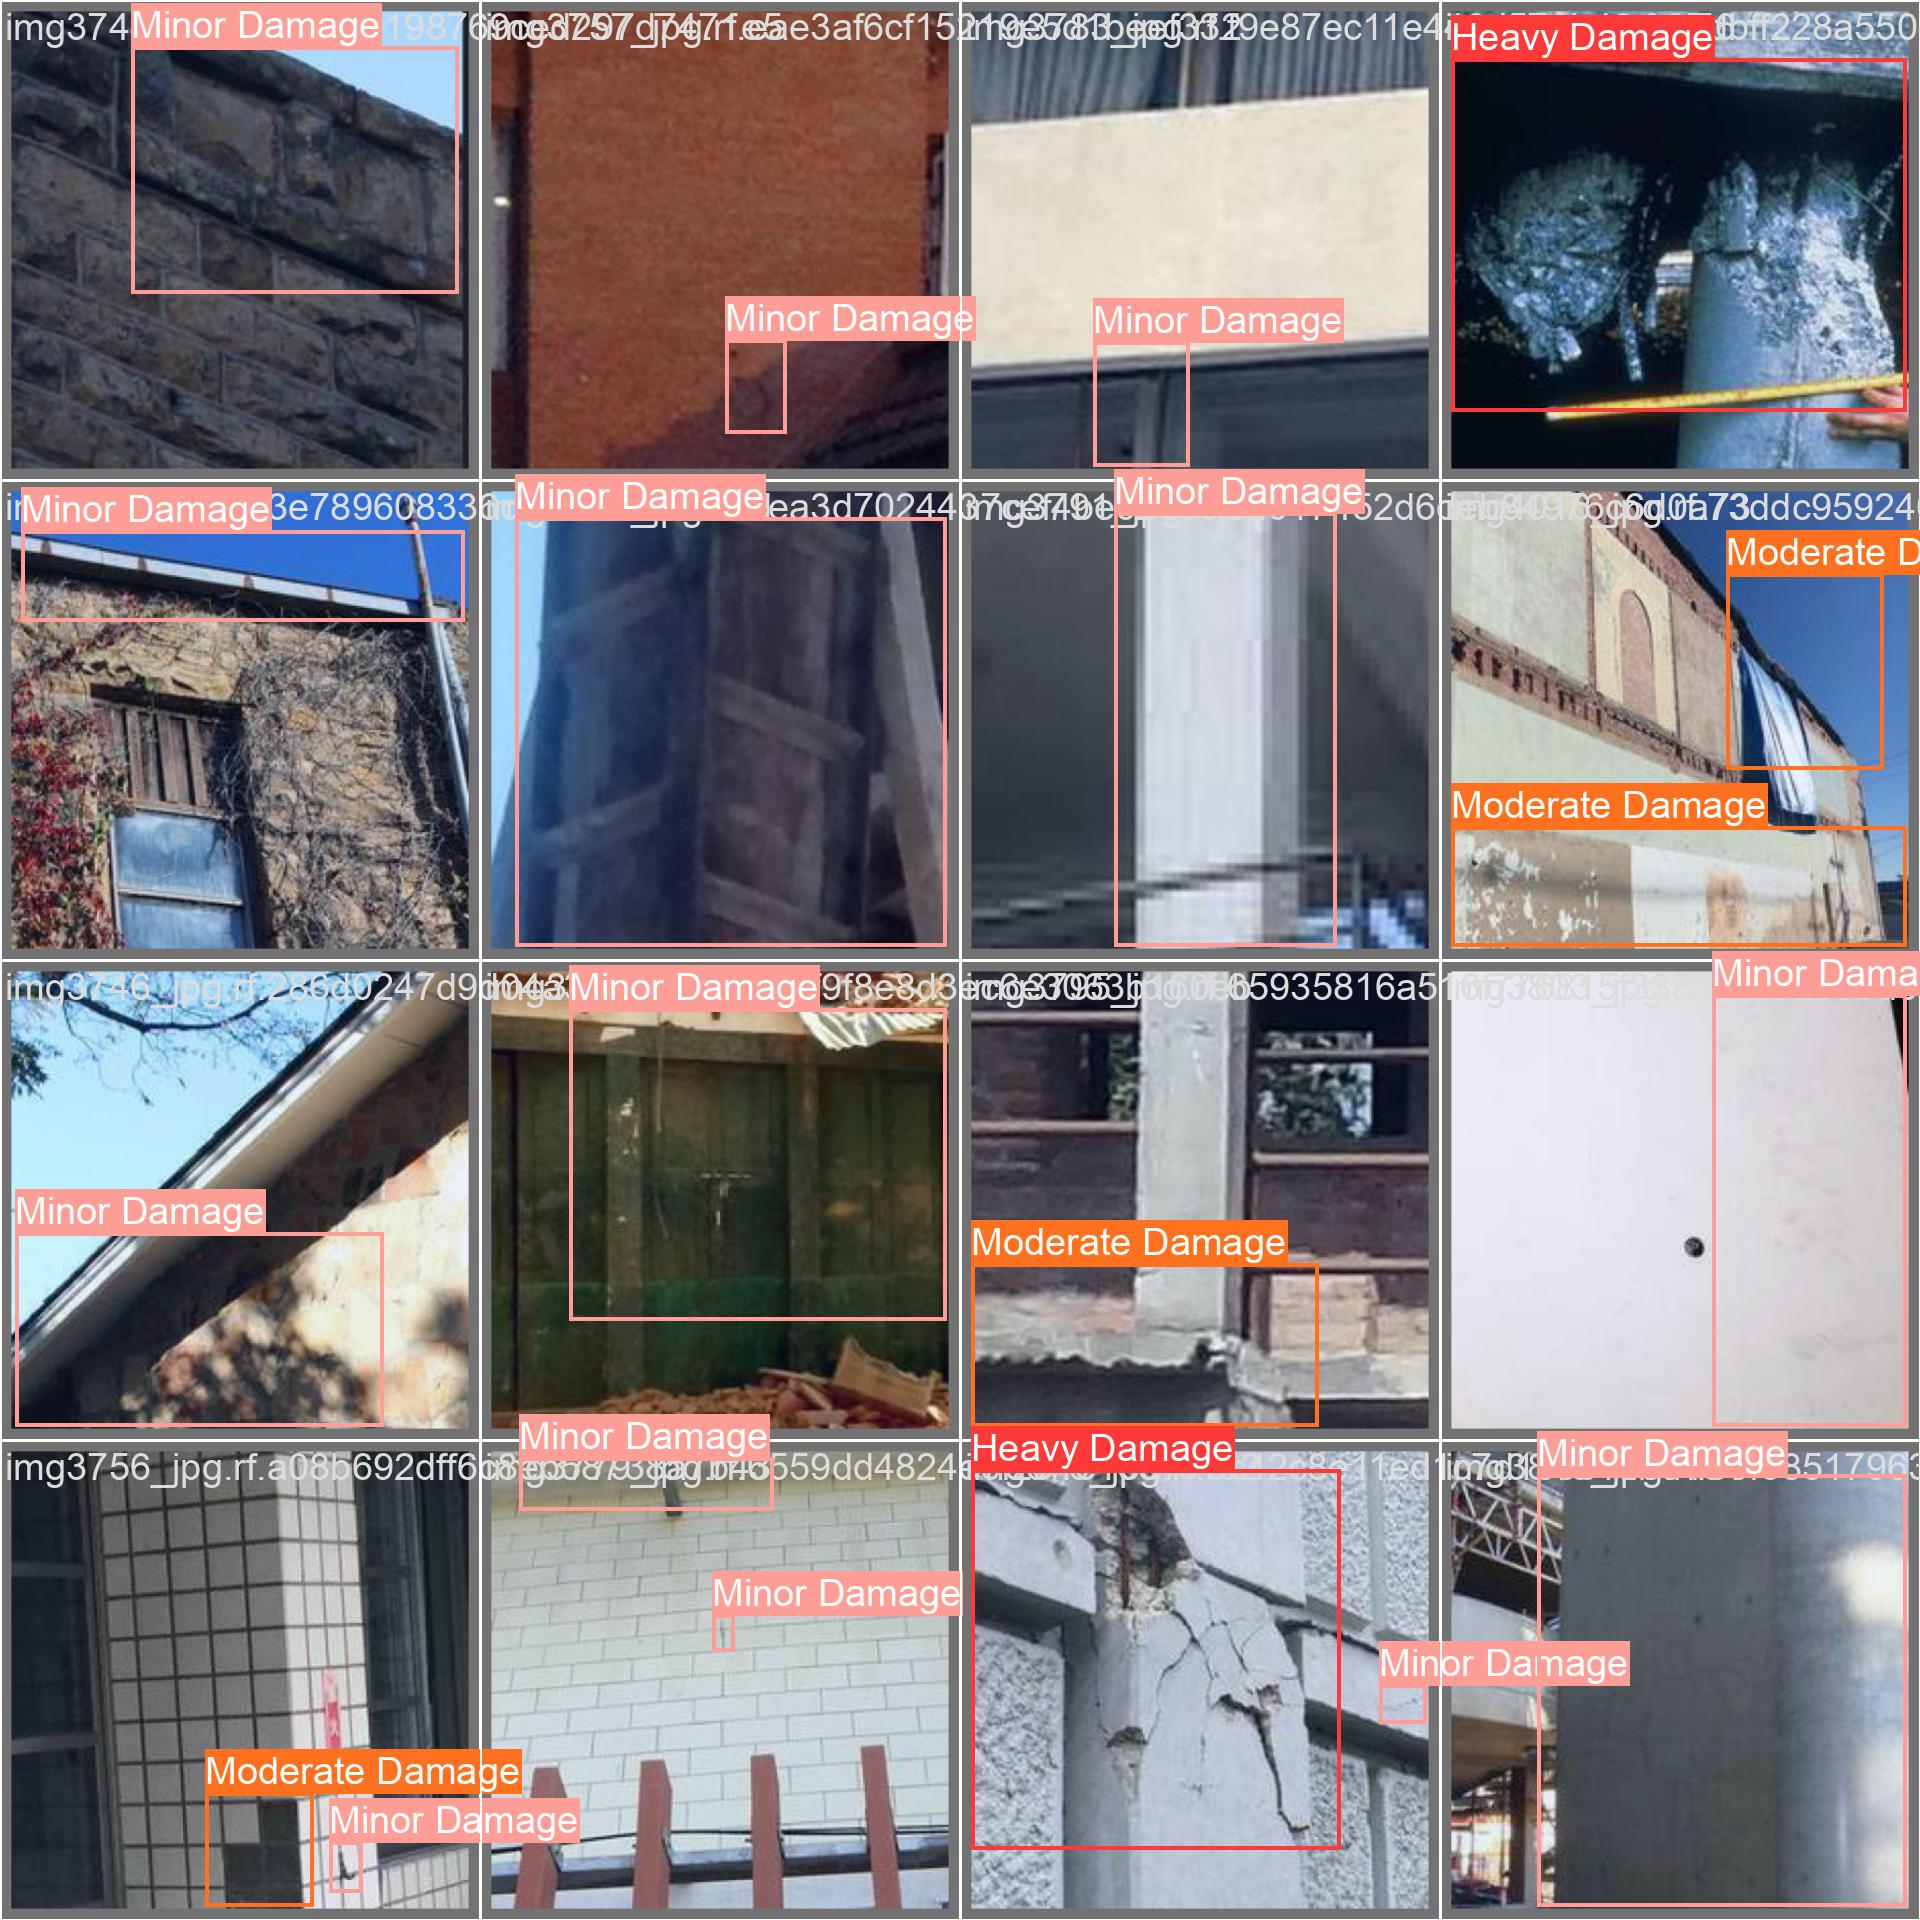

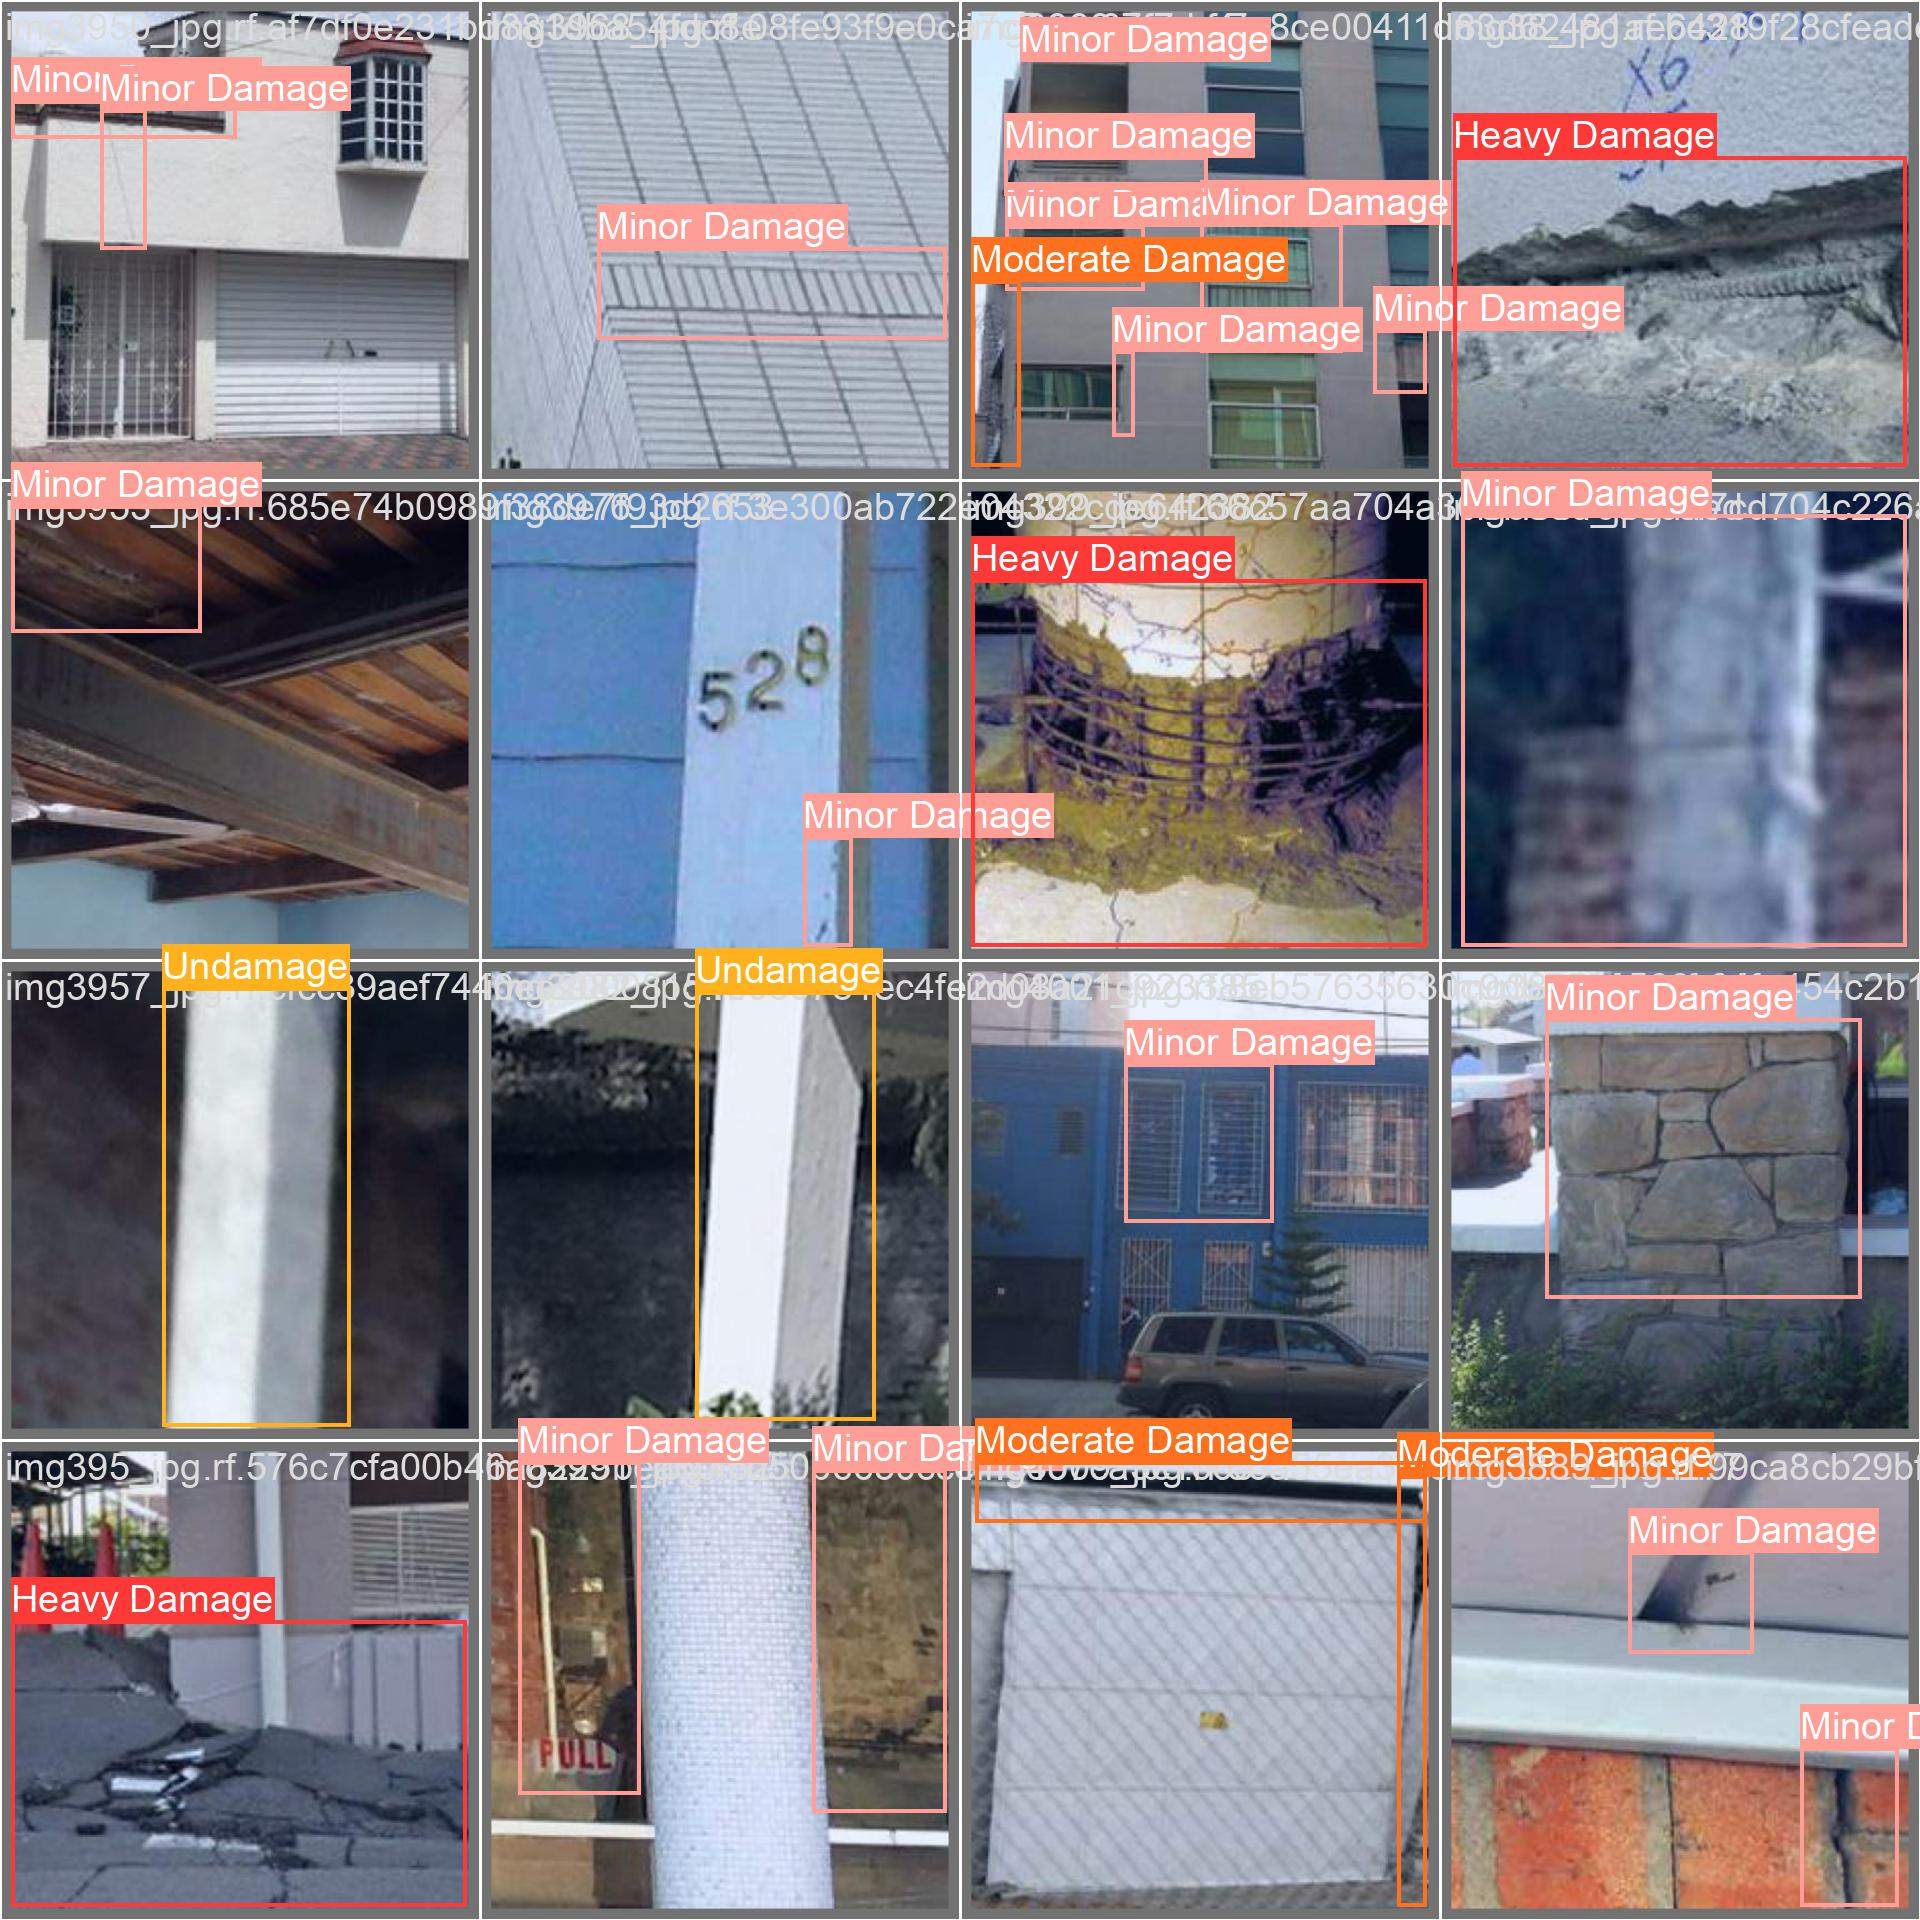

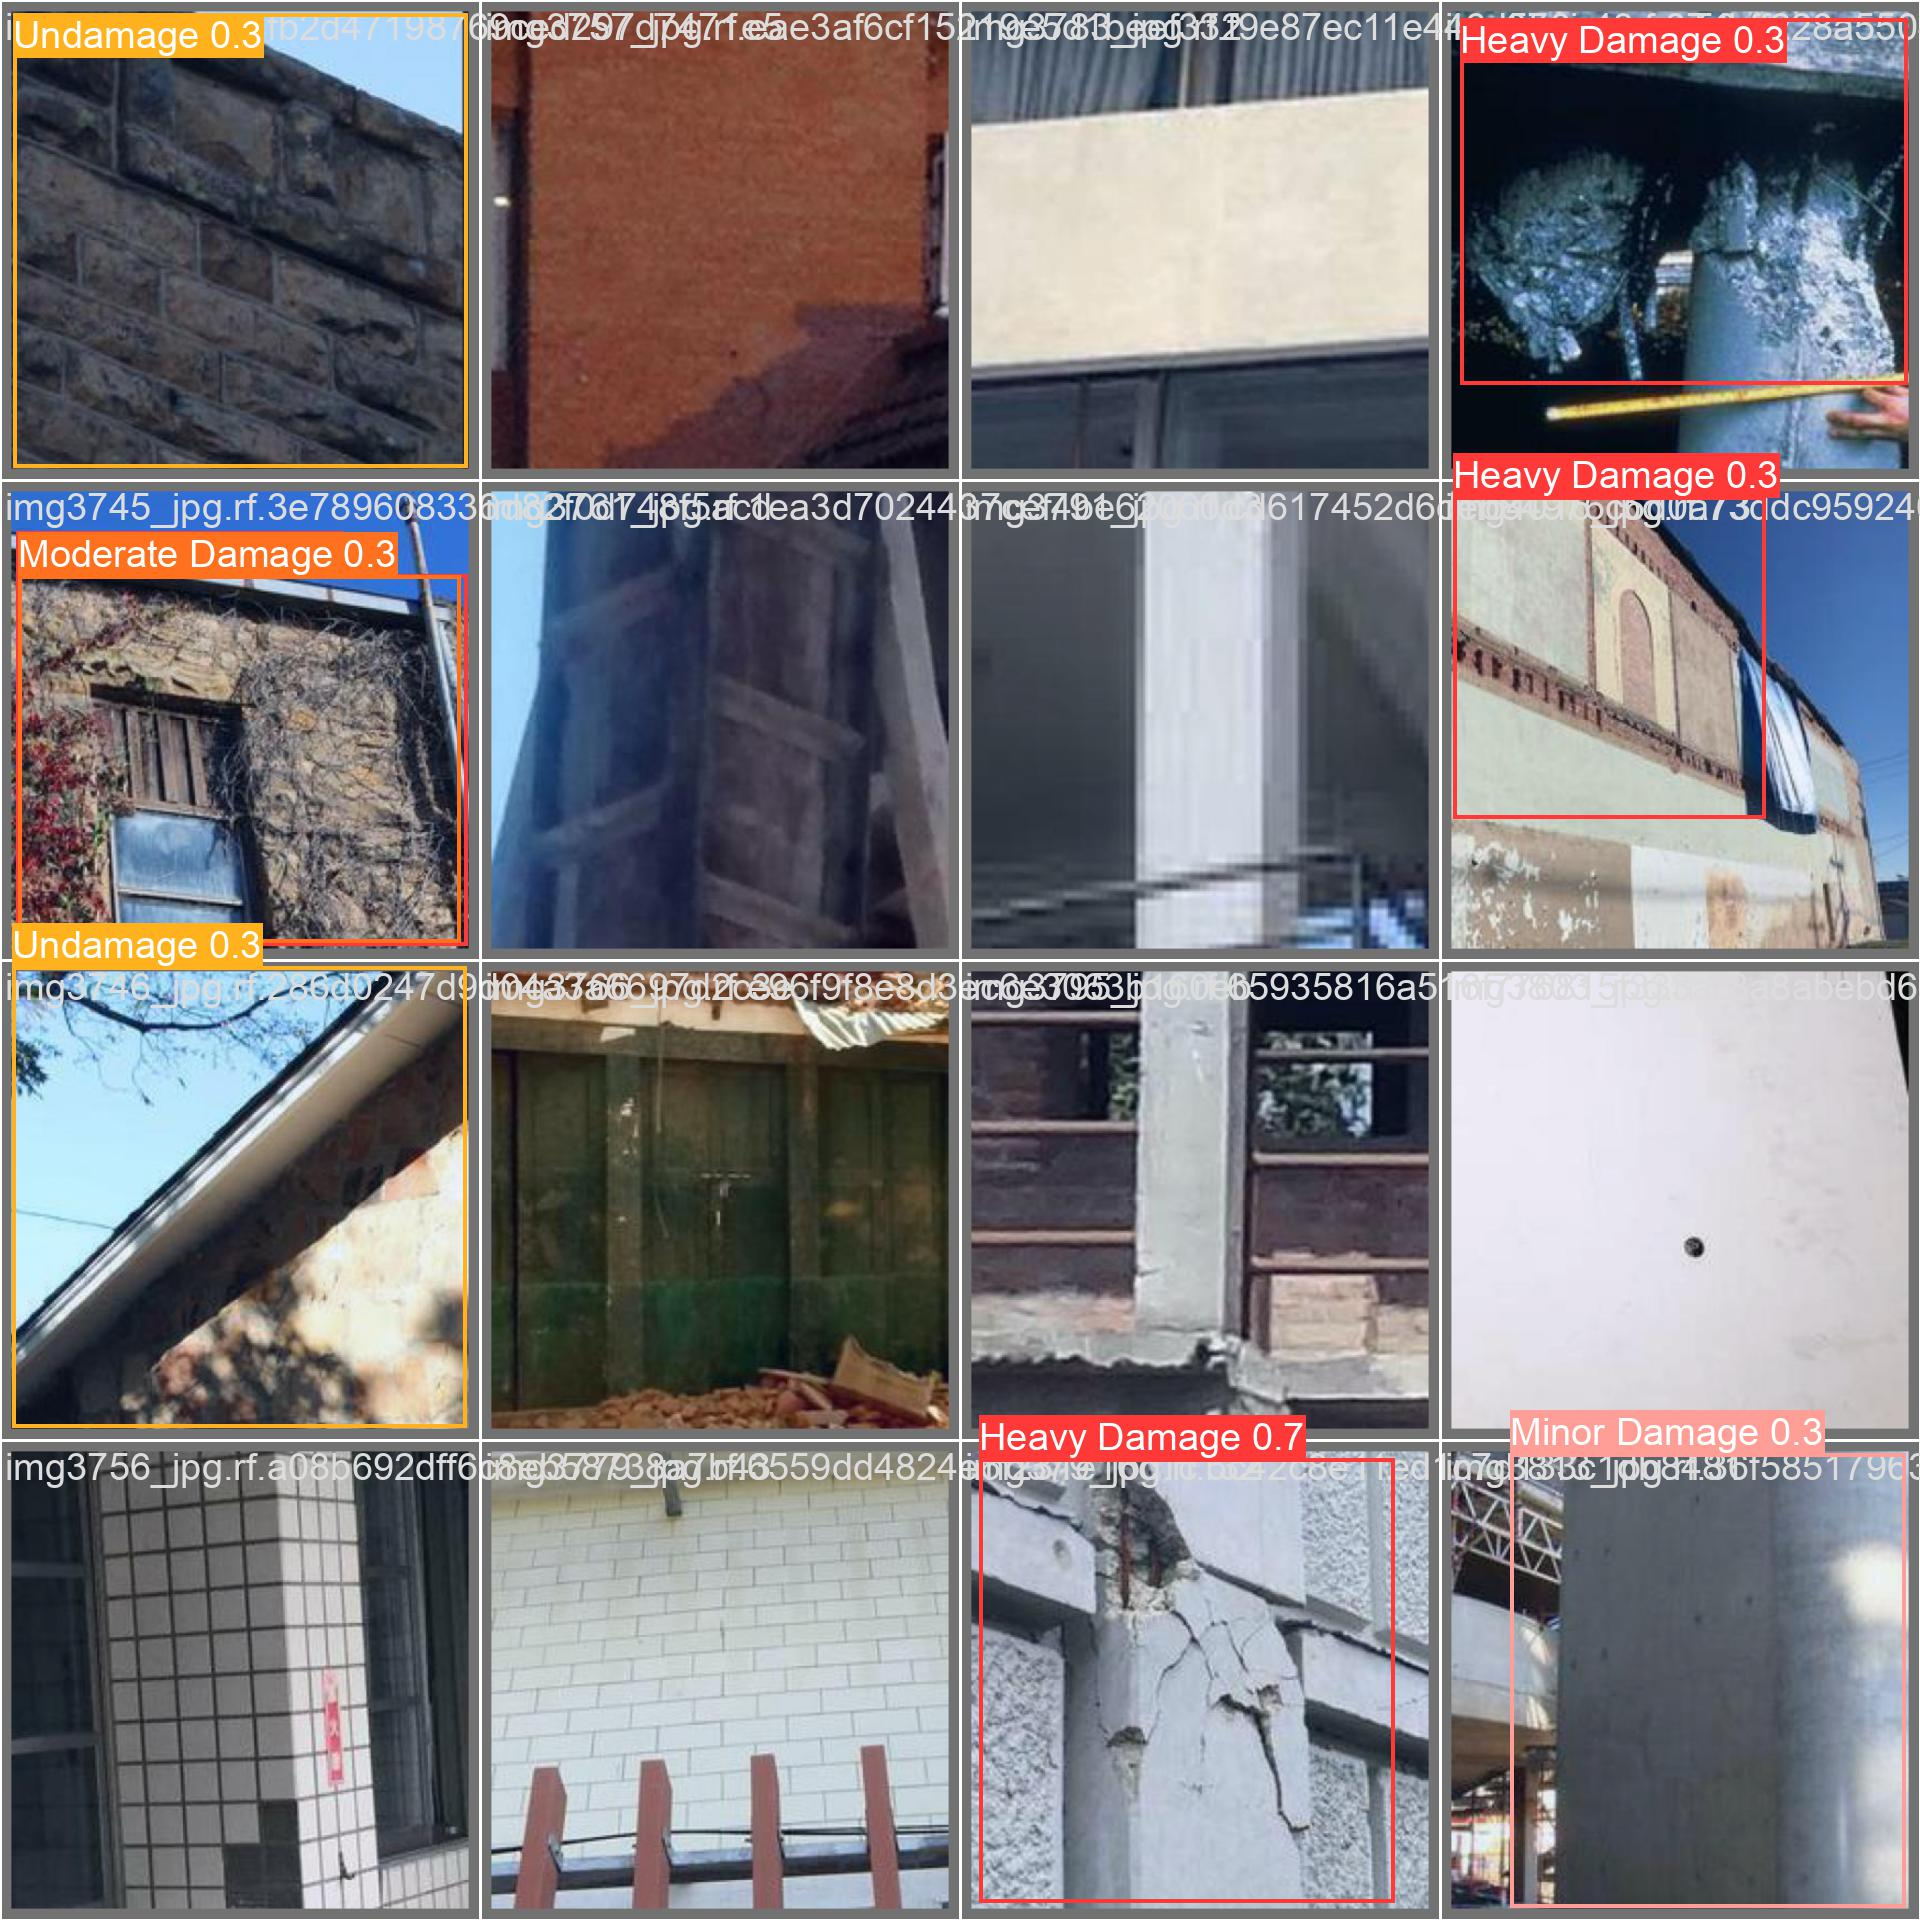

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/val2/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")